# 第十六课 实战Ridge & Lasso Regression解决线性回归的Overfitting过度拟合


Python零基础学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

源文件下载链接: https://pan.baidu.com/s/1yuNlG6u9_C31fzhzbzqASA 提取码: ebrh

Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
from sklearn.datasets import load_boston

In [178]:
boston=load_boston()

In [179]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [180]:
X=pd.DataFrame(boston['data'])

In [181]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [182]:
X.columns=boston['feature_names']

In [183]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [184]:
y=boston.target

In [185]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [186]:
y.shape

(506,)

In [187]:
type(y)

numpy.ndarray

## Linear Regression 要点一：为什么没使用14课中的train_test_split及训练集测试集？


In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linregressor=LinearRegression()
cvscore=cross_val_score(linregressor,X,y,cv=5)

In [189]:
cvscore

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [190]:
mean_cvscore=np.mean(cvscore)

In [191]:
print(mean_cvscore)

0.353275924395884


## Ridge Regression 要点二：加入parameters多个备选参数由算法决定最佳调参

In [192]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,500,1000]}
ridgeregressor=GridSearchCV(ridge,parameters,cv=5)
ridgeregressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 200, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [193]:
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 200}
0.49798762179623146


## Ridge Regression 要点三：算法决定最佳调参后可以再进一步精细化

In [194]:
#ridge=Ridge()
parameters={'alpha':[160,170,180,190,200,210,230]}
ridgeregressor=GridSearchCV(ridge,parameters,cv=5)
ridgeregressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [160, 170, 180, 190, 200, 210, 230]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [195]:
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 180}
0.4982367681072657


## Lasso Regression

In [196]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,500]}
lassoregressor=GridSearchCV(lasso,parameters,cv=5)

lassoregressor.fit(X,y)
print(lassoregressor.best_params_)
print(lassoregressor.best_score_)

C:\Users\raymond\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4685.292042663493, tolerance: 3.919148542079209
  positive)
C:\Users\raymond\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4175.730901660939, tolerance: 3.3071316790123473
  positive)
C:\Users\raymond\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4102.124474784773, tolerance: 2.813643886419753
  positive)
C:\Users\raymond\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

{'alpha': 1}
0.4318487879265221


In [197]:
Lasso(alpha=1, fit_intercept=False, tol=0.00000000000001,max_iter=10000000000000, positive=True)

Lasso(alpha=1, copy_X=True, fit_intercept=False, max_iter=10000000000000,
      normalize=False, positive=True, precompute=False, random_state=None,
      selection='cyclic', tol=1e-14, warm_start=False)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [199]:
prediction_lasso=lassoregressor.predict(X_test)
prediction_ridge=ridgeregressor.predict(X_test)

In [200]:
prediction_ridge

array([23.8221835 , 25.20259785, 27.53093947, 14.58951793, 19.6074286 ,
       21.69483525, 21.4566671 , 23.61199647, 20.7368666 , 19.58217475,
        6.63735854, 13.94947909, 18.49317999,  7.72499122, 36.3522899 ,
       31.18961686, 22.33460779, 34.97976822, 30.83078488, 24.46734842,
       25.47472001, 24.6587079 , 20.17171431, 30.01063275, 22.97537586,
       15.45690209, 18.90690169, 21.75900952, 32.56455397, 19.74393167,
       18.12048305, 20.06946532, 20.97263715, 23.81262096, 28.96841294,
       20.7965572 , 10.95091512, 25.35142051, 16.23333426, 13.4982668 ,
       24.98278871, 20.39690622, 21.61521524, 16.39149259, 22.65891092,
       25.1457976 , 18.73402526, 23.8338197 , 12.33037924, 23.8180197 ,
       21.52664928, 17.3346035 , 24.96628962, 27.89463941, 13.76088933,
       21.3597084 , 20.75545937, 15.80907985, 16.20859966, 19.5075779 ,
       19.53138931, 21.89707787, 31.58387677, 31.47599653, 18.42654404,
       31.76658571, 19.22691897, 18.3864344 , 16.63161167, 22.86

In [201]:
prediction_lasso

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

<AxesSubplot:ylabel='Count'>

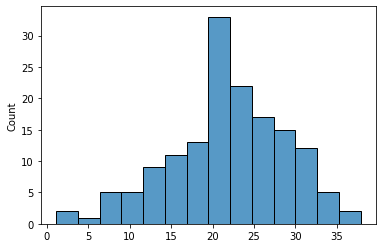

In [202]:
import seaborn as sns

sns.histplot(prediction_lasso)

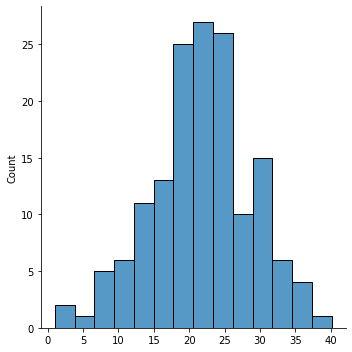

In [203]:
import seaborn as sns

sns.displot(prediction_ridge)